In [1]:
import os, sys
%pylab inline
plt.style.use("default")
plt.rcParams["figure.figsize"] = (12,5)

Populating the interactive namespace from numpy and matplotlib


In [93]:
def generate_data(n_ds = 1, n_obs = 10, noise_sd = 0.1, seed = 0):
    random.seed(seed)

    x = np.linspace(0, 1, n_obs)

    X, Y = [], []
    
    for i in range(n_ds):
        y = sin(2 * pi * x) + randn(n_obs) * noise_sd
        X.append(x)
        Y.append(y)

    return X, Y

def compute_features(x, n_feat = 24, feat_sd = 0.1):
    # Features are a set of Gaussian functions with means equally spaced in [0, 1]
    means = linspace(0, 1, n_feat)
    return array([0*x + 1] + [exp(-0.5 * (x - m)**2 / feat_sd**2) for m in means]).T

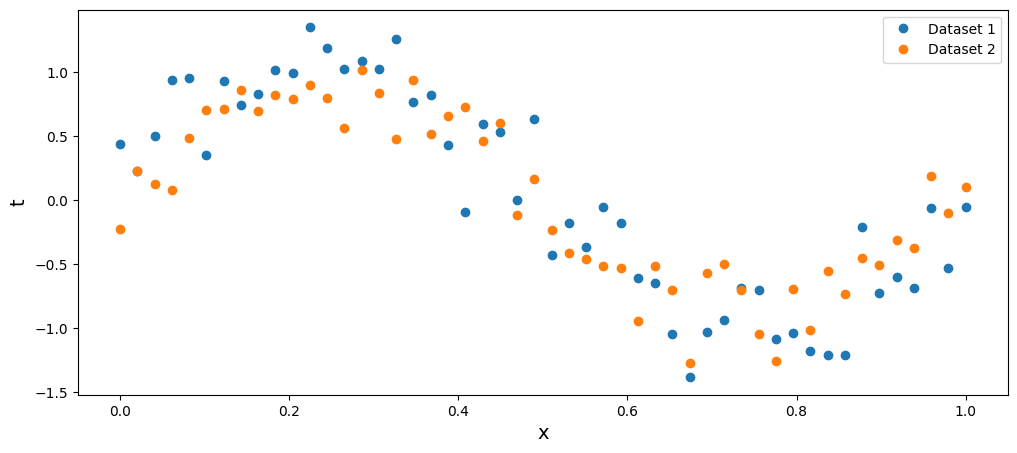

In [150]:
noise_sd = 0.25
X, Y = generate_data(n_ds = 10, n_obs = 50, noise_sd = noise_sd, seed = 0)
plot(X[0], Y[0], "o", label="Dataset 1")
plot(X[1], Y[1], "o", label="Dataset 2")
xlabel("x", fontsize=14); ylabel("t", fontsize=14); legend();


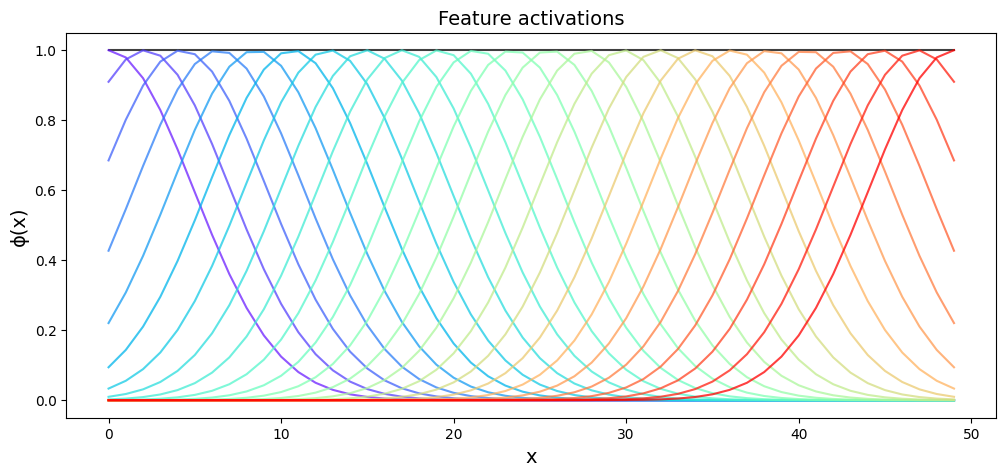

In [149]:
n_feat = 24
Phi = compute_features(X[0], n_feat = n_feat, feat_sd = 0.1) # Features are the same for all datasets
[plot(Phi_i, color="k" if i == 0 else cm.rainbow(i/n_feat), alpha=0.75) for i,Phi_i in enumerate(Phi.T)]
xlabel("x", fontsize=14); ylabel("ϕ(x)", fontsize=14); title("Feature activations", fontsize=14);

In [110]:
# Loss(w) = 1/2σ² * (y - w'ϕ(x))² + λ w'w/2
# ∇Loss(w) = -1/σ² * (y - w'ϕ(x))ϕ(x) + λw
#          = 0 -> w = (ϕ(x)'ϕ(x) + λσ²I)^-1 ϕ(x)'y
def solve(Phi, Y, noise_sd=1, λ=0):
    M = Phi.shape[1]
    I = eye(M)
    G = Phi.T @ Phi + λ * noise_sd**2 * I
    w_ds = [linalg.solve(G, Phi.T @ y) for y in Y]
    y_ds = [Phi @ w for w in w_ds]
    return w_ds, y_ds

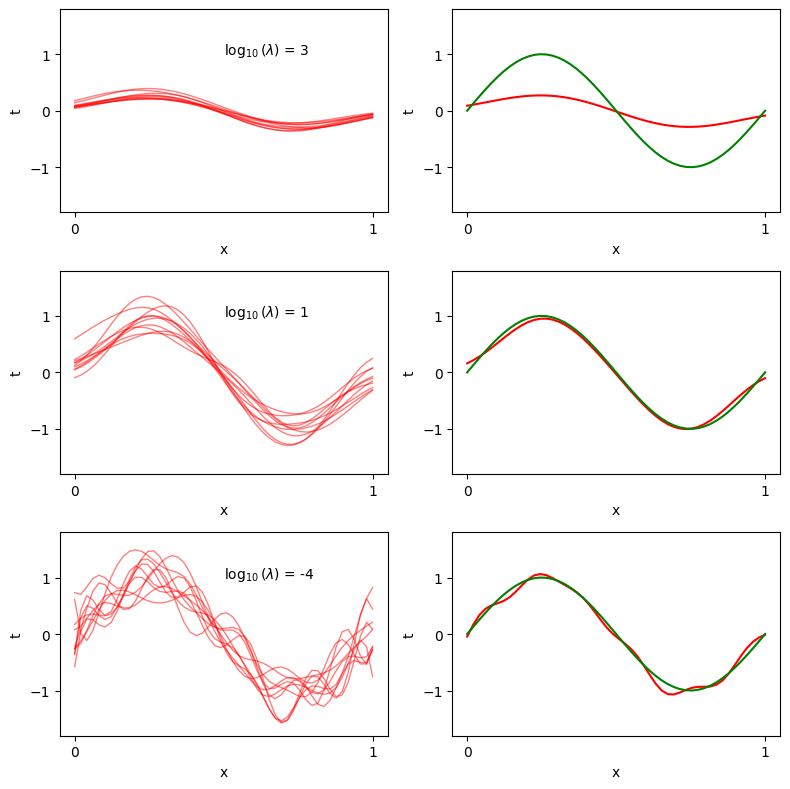

In [133]:
figure(figsize=(8, 8))
λ_vals = [5e2, 1e1, 1e-4]
for i, λ in enumerate(λ_vals):
    w_ds, y_ds = solve(Phi, Y, noise_sd = noise_sd, λ = λ)
    y_ds = array(y_ds).T

    subplot(3, 2, 2*i + 1)
    plot(X[0], y_ds, "r", lw=1, alpha=0.5)
    ylim(-1.8, 1.8)
    gca().set_xticks([0,1])
    xlabel("x"); ylabel("t");
    text(0.5, 1, "$\log_{10}(\\lambda)$ = " +f"{log10(λ):.1g}", ha="left")
    
    subplot(3, 2, 2*i + 2)
    plot(X[0], mean(y_ds, axis=1), "r"); ylim(-1.8, 1.8)
    plot(X[0], sin(2*pi*X[0]), "g")
    gca().set_xticks([0,1])    
    xlabel("x"); ylabel("t");
tight_layout()    



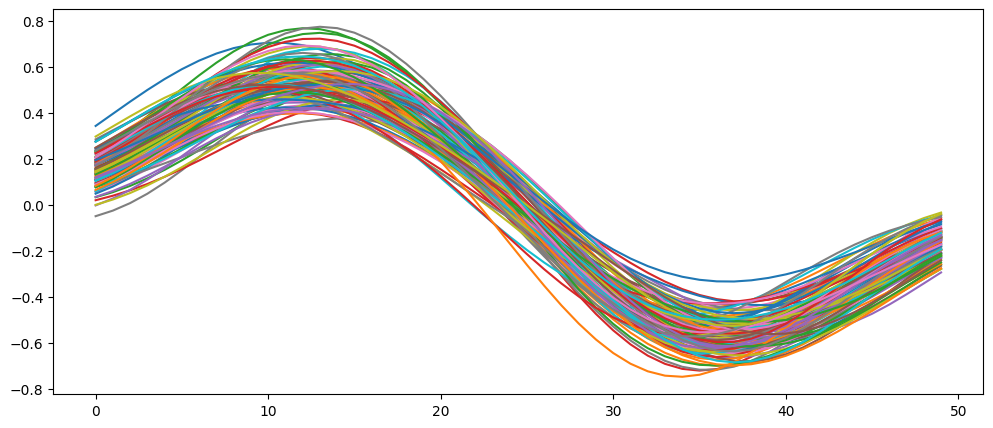

In [92]:
plot(array(y_ds).T)

In [79]:
yfit_ds.shape

AttributeError: 'list' object has no attribute 'shape'

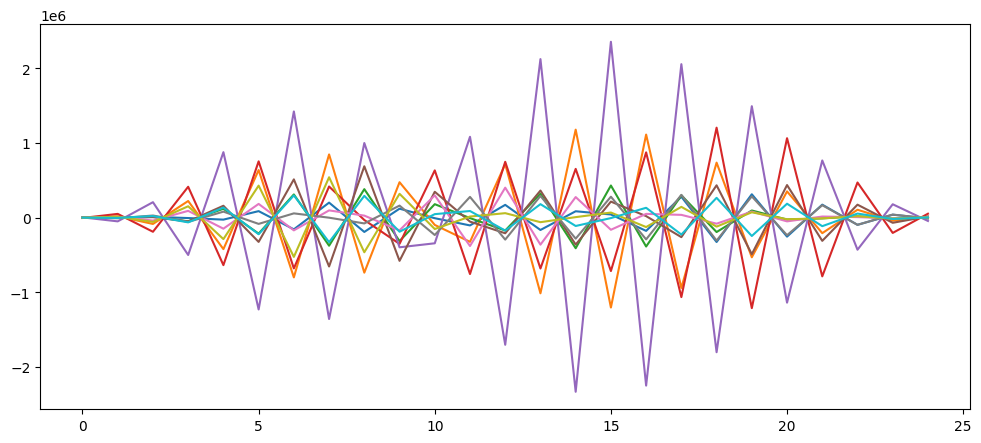

In [60]:
plot(w_ds)

In [53]:
w_ds.shape

(25, 10)

In [ ]:
plot(

In [46]:
w

array([   144.53102599,   -945.07762007,   2172.76752424,  -1246.10428578,
        -5105.45335314,  17075.9163459 , -30964.80714041,  39838.19522004,
       -38006.9463344 ,  23770.52230423,  -1501.40348892, -20743.28353357,
        33966.99496723, -32764.00355669,  16765.55859606,   8683.77962685,
       -35631.20126637,  56019.67989892, -65251.71474239,  62476.935103  ,
       -50759.5227247 ,  34648.74227699, -19228.32615833,   7835.40567776,
        -1886.80954125])

In [40]:
Y[0].shape

(100,)

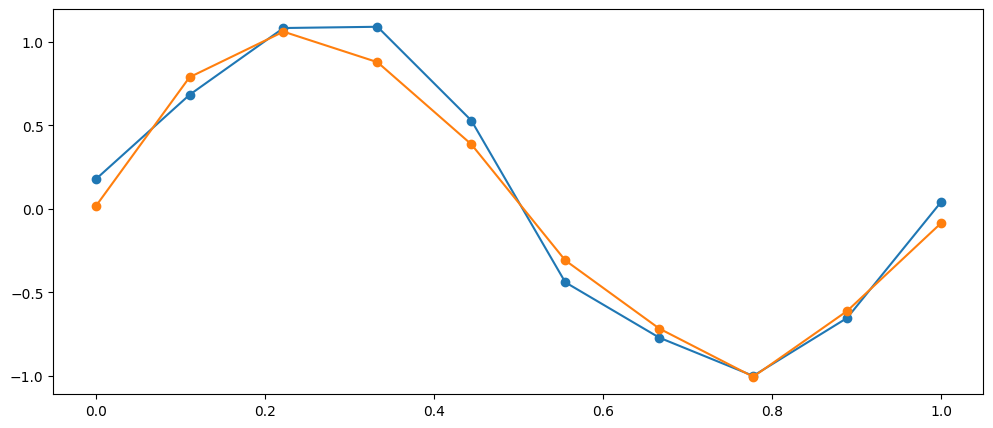

In [12]:
plot(X[0], Y[0], "o-")
plot(X[1], Y[1], "o-")
